In [24]:
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np

In [2]:
df = pd.read_csv('.\data\BaseballSalaries2019.csv')
df.head()

,Name,Salary,Team,POS
0,Max Scherzer,42.143,WSH,SP
1,Stephen Strasburg,36.429,WSH,SP
2,Mike Trout,34.083,LAA,CF
3,Zack Greinke,32.422,ARI,SP
4,David Price,31.000,BOS,SP


## Population Distribution

In [19]:
def add_text(ax, t, xy):
    ax = ax.annotate(t, xy=xy, xycoords='data',
        xytext=(15, 0), textcoords='offset points')

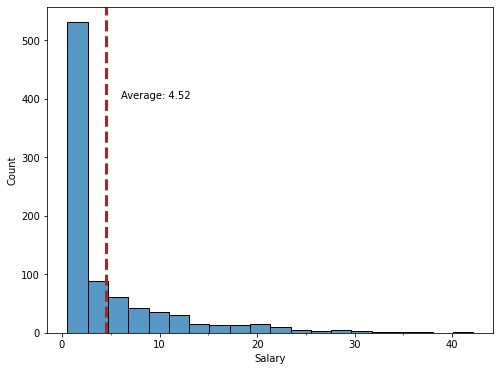

In [22]:
fig, ax = plt.subplots(figsize =(8,6))
ax = sns.histplot(data = df, x = 'Salary', bins = 20, ax = ax)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.axvline(x=avg, linewidth=3, color='firebrick', linestyle = 'dashed')
add_text(ax, f'Average: {avg:.2f}', (avg, 400))

## Sampling Distribution

In [4]:
SIMULATIONS = 5000
N = 30

In [5]:
avgs = []
for _ in range(SIMULATIONS):    
    avgs.append(df.sample(N)['Salary'].mean())

avg = sum(avgs) / len(avgs)

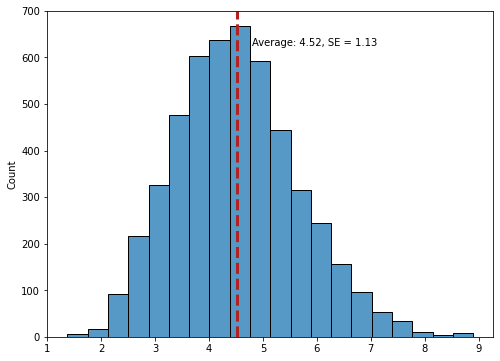

In [31]:
fig, ax = plt.subplots(figsize =(8,6))
ax = sns.histplot(x = avgs, bins = 20, ax = ax)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.axvline(x=avg, linewidth=3, color='firebrick', linestyle = 'dashed')

add_text(ax, f'Average: {avg:.2f}, SE = {np.std(avgs, ddof = 1):.2f}', (avg, 625))

## Standard Error

In [26]:
avgs_arr = np.array(avgs)

In [29]:
np.std(avgs_arr, ddof = 1)

1.134428502549928